**import Libraries and ML Models**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


**Load Dataset and add column names as per dataset description**

In [4]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

df = pd.read_csv(url, names=columns)
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Preprocess Data**

In [7]:
df.isnull().sum()

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size = 0.20, random_state = 42)


**Now We will train models**

**1. Logistic Regression**

In [8]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("Logistic Regression Accuracy", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

Logistic Regression Accuracy 0.7532467532467533
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



**2. Support Vector Machine**

In [9]:
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

print("SVM Accuracy", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

SVM Accuracy 0.7272727272727273
              precision    recall  f1-score   support

           0       0.77      0.82      0.79        99
           1       0.63      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154



**3. Random Forest**

In [11]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest Accuracy", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


Random Forest Accuracy 0.7272727272727273
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



**Comparing all 3 models - accuracy table **

In [16]:
model_accuracies = {
    "Logistic Regression": accuracy_score(y_test, lr_pred),
    "SVM": accuracy_score(y_test, svm_pred),
    "Random Forest": accuracy_score(y_test, rf_pred)
}

comparison_df = pd.DataFrame.from_dict(model_accuracies, orient="index", columns=["accuracy"])
comparison_df.sort_values(by="accuracy", ascending=False)

,accuracy
Logistic Regression,0.753247
SVM,0.727273
Random Forest,0.727273


**Evaluate Model with Confusion Matrix**

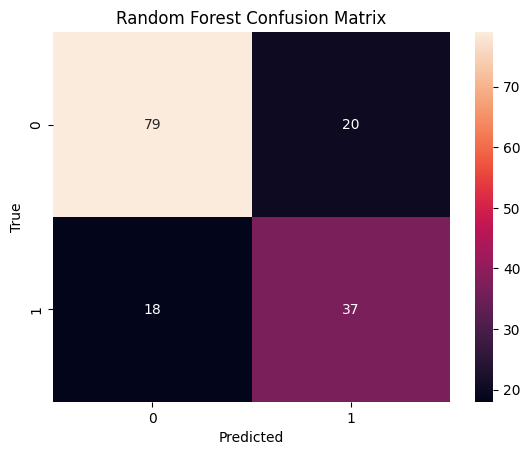

In [18]:
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='d')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

**Feature Importance (Random Forest)**

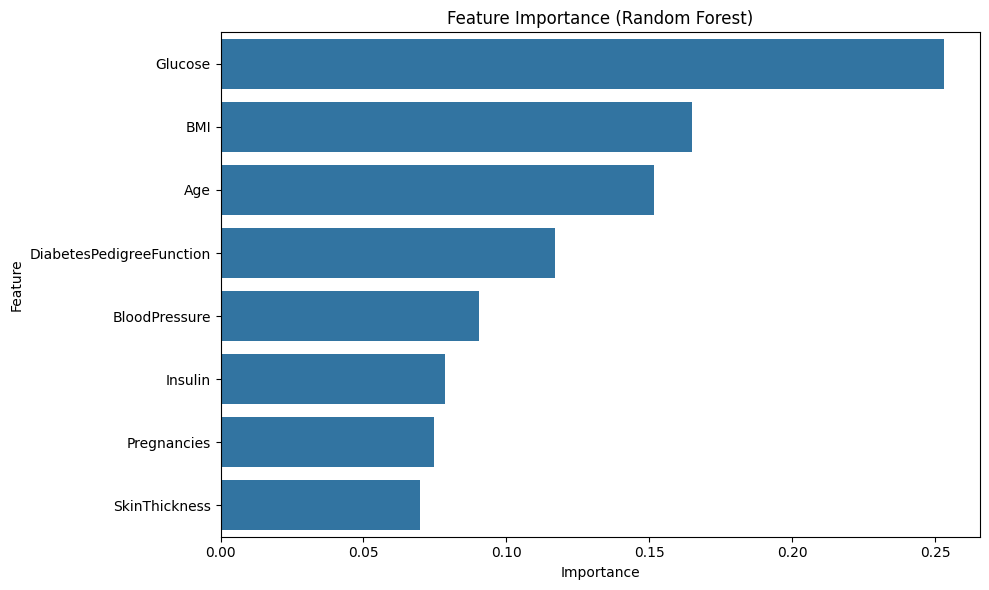

In [22]:
importances = rf.feature_importances_

feature_names = X.columns
feature_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_df = feature_df.sort_values(by = "Importance", ascending = False)

plt.figure(figsize=(10,6))
sns.barplot(x = "Importance" , y="Feature", data = feature_df)
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()